# **Studenet Performance Indtcator**

Life Cycle Of ML Project

* Understaning The Problem Statement
* Data Collection.
* Data Checks Perform
* EDA
* Data Pre-processing
* Model Training
* Chosse The Best Model



# 1) Problem Statement

This Project Understand How the student Performance test scores  is affected by other Variables

# 2) Data Collection

>  The Data Is Taken From `Kaggle`.

> Dataset Source - [https://www.kaggle.com/datasets/spscientist/students-performance-in-exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams).

### 2.1) Importing Data And Othre Important Packages .
Import Pandas Numpy Matplotlib Warnings and Seaborn

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


### Import The Data And Show top 2 rows

In [8]:
student_df=pd.read_csv("../data/stud.csv")
student_df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### Shape of Data

In [9]:
student_df.shape

(1000, 8)

### 2.2 Dataset information
* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score


# 3. Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

### 3.1 Check Missing values

In [10]:
student_df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### There Are No Missing Values In The Dataset

###  3.2   Check Duplicates

In [11]:
student_df.duplicated().sum()

0

### There Are No Duplicates Values In The Dataset

### 3.3 Check Data Types and Describe Data Types

In [12]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
student_df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 3.4 Check No. Of Unique Values For Eact Column

In [14]:
student_df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### **Insight**
* From above description of numerical data, all means are very close to each other - between 66 and 68.05;
* All standard deviations are also close - between 14.6 and 15.19;
* While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [15]:
print("Categories in 'gender' variable:     ",end=" " )
print(student_df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(student_df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(student_df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(student_df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(student_df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [16]:
for feature in student_df.columns:
    print(student_df[feature].dtype)

object
object
object
object
object
int64
int64
int64


In [17]:
numerical_features=[feature for feature in student_df.columns if student_df[feature].dtype!='O']
categorical_features=[feature for feature in student_df.columns if student_df[feature].dtype=='O']

In [18]:
print("We Have {} numerical features:  {}".format(len(numerical_features),numerical_features))
print("\nWe Have {} Categorical features:  {}".format(len(categorical_features),categorical_features))

We Have 3 numerical features:  ['math_score', 'reading_score', 'writing_score']

We Have 5 Categorical features:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [19]:
student_df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [29]:
math_full=len(student_df[student_df.math_score == student_df.math_score.max()])
reading_full=len(student_df[student_df.reading_score == student_df.reading_score.max()])
writing_full=len(student_df[student_df.writing_score == student_df.writing_score.max()])

In [30]:
print(f"The No. of students who got full marks in maths {math_full}")
print(f"The No. of students who got full marks in Reading {reading_full}")
print(f"The No. of students who got full marks in Writing {writing_full}")

The No. of students who got full marks in maths 7
The No. of students who got full marks in Reading 17
The No. of students who got full marks in Writing 14


In [31]:
student_df["total_marks"]=student_df["math_score"]+student_df["writing_score"]+student_df["reading_score"]
student_df["average_marks"]=student_df["total_marks"]/3

In [32]:
student_df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,average_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [34]:
threshold_value=20
math_less=len(student_df[student_df.math_score <= threshold_value])
writing_less=len(student_df[student_df.writing_score <= threshold_value])
reading_less=len(student_df[student_df.reading_score <= threshold_value])

In [35]:
print(f"The No. of students who got less than 20 marks in maths {math_less}")
print(f"The No. of students who got less than 20 marks in Reading {reading_less}")
print(f"The No. of students who got less than 20 marks in Writing {writing_less}")

The No. of students who got less than 20 marks in maths 4
The No. of students who got less than 20 marks in Reading 1
The No. of students who got less than 20 marks in Writing 3


## Insights
* From Above Values we got students have performed the worst in maths
* Best Performance in reading section

# 4) **EDA-Explorartory Data Visualisation**

## 4.1) Visualize average score distribution to make some conclusion.
* Histogram
* Kernel Distribution Function (KDE)

### 4.1.1) Histogram & KDE


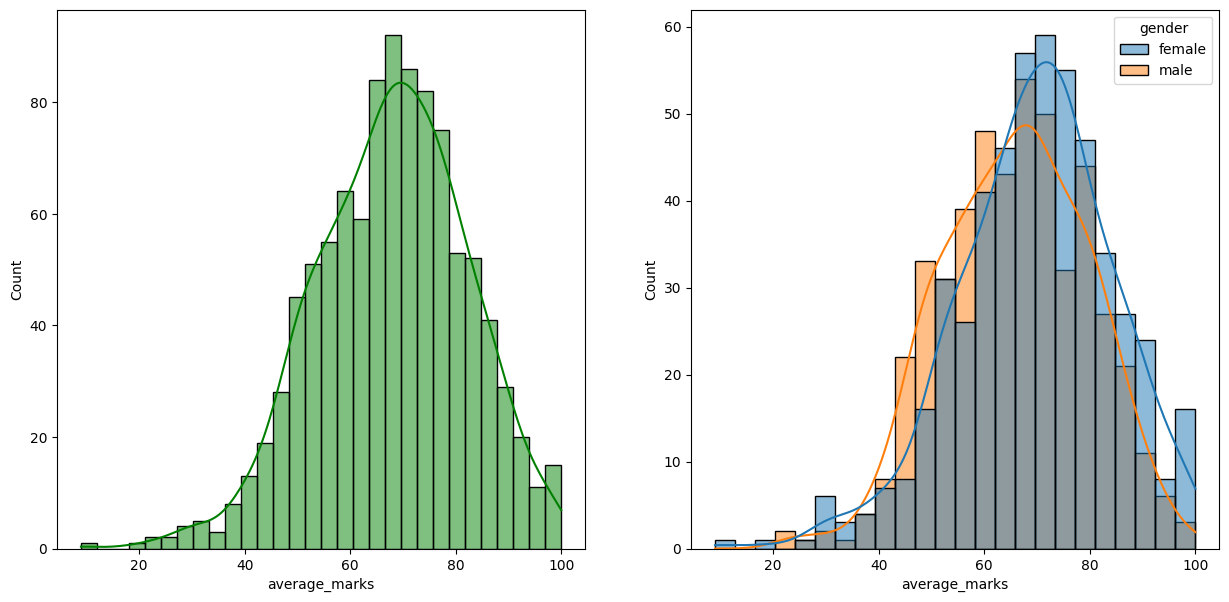

In [37]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=student_df,x="average_marks",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=student_df,x="average_marks",kde=True,hue='gender')
plt.show()

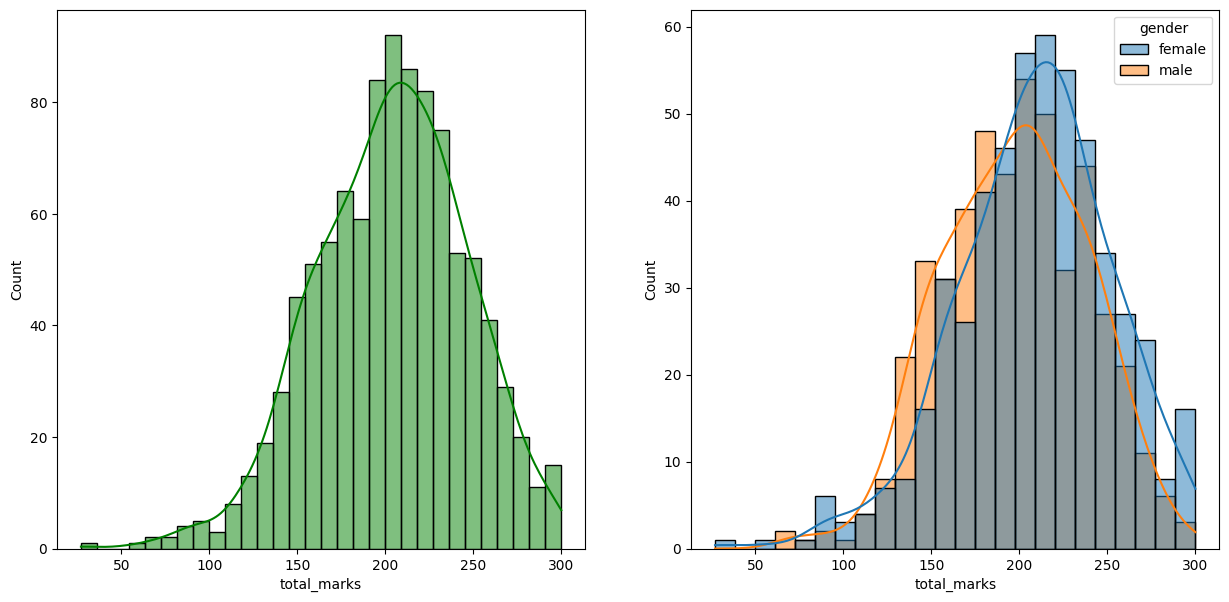

In [40]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=student_df,x='total_marks',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=student_df,x='total_marks',kde=True,hue='gender')
plt.show()

### Insights
* Female students tend to perform well then male students.

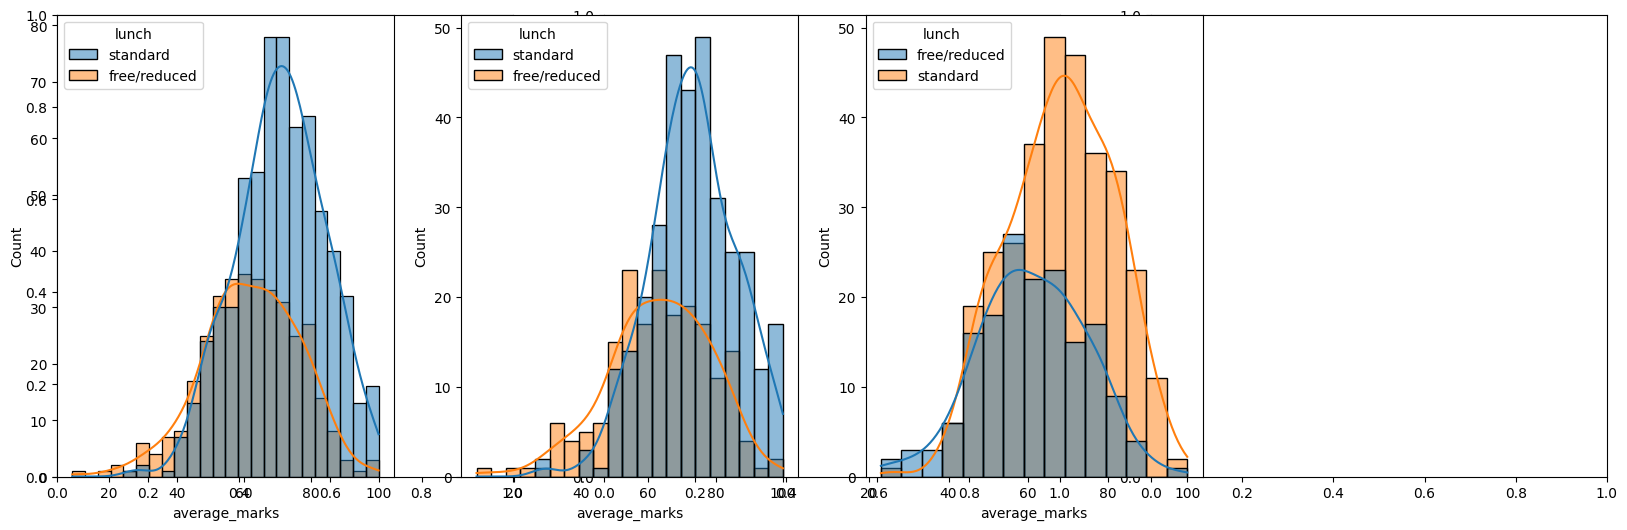

In [44]:
plt.subplots(1,3,figsize=(20,6))
plt.subplot(141)
sns.histplot(data=student_df,x='average_marks',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=student_df[student_df.gender=='female'],x='average_marks',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=student_df[student_df.gender=='male'],x='average_marks',kde=True,hue='lunch')
plt.show()

# Insights
* Standard lunch helps perform well in exams.
* Standard lunch helps perform well in exams be it a male or a female.

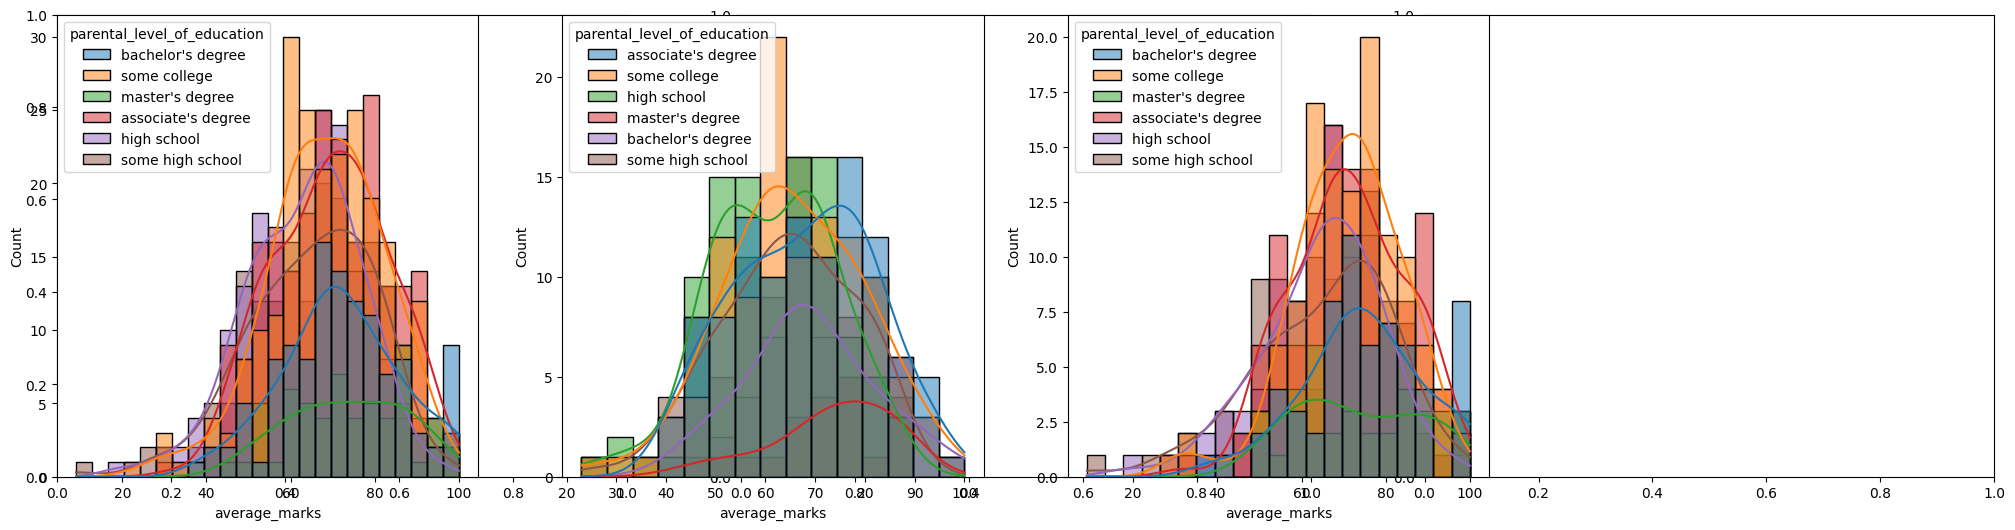

In [47]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=student_df,x='average_marks',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=student_df[student_df.gender=='male'],x='average_marks',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=student_df[student_df.gender=='female'],x='average_marks',kde=True,hue='parental_level_of_education')
plt.show()

# Insights
* In general parent's education don't help student perform well in exam.
* 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
* 3rd plot we can see there is no effect of parent's education on female students.

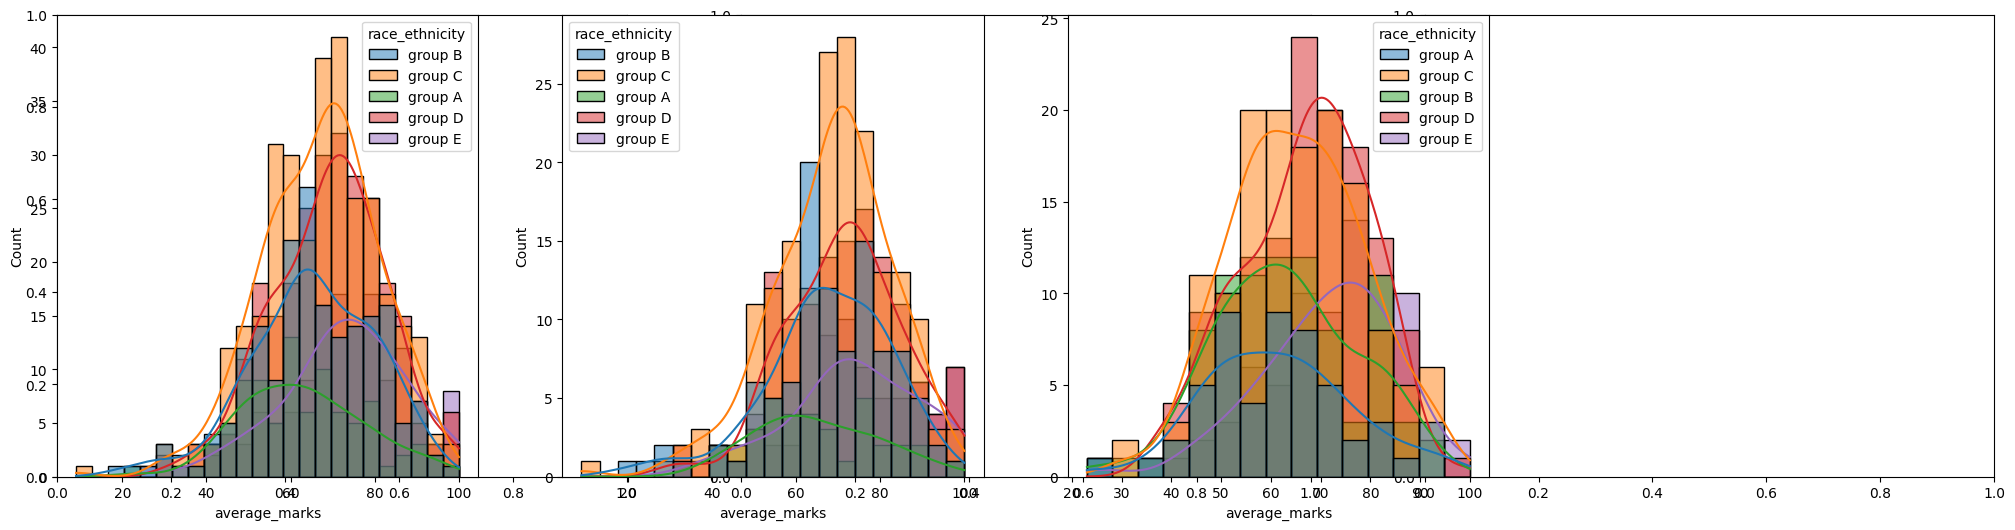

In [49]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=student_df,x='average_marks',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=student_df[student_df.gender=='female'],x='average_marks',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=student_df[student_df.gender=='male'],x='average_marks',kde=True,hue='race_ethnicity')
plt.show()

# Insights
* Students of group A and group B tends to perform poorly in exam.
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### 4.2 Maximumum score of students in all three subjects

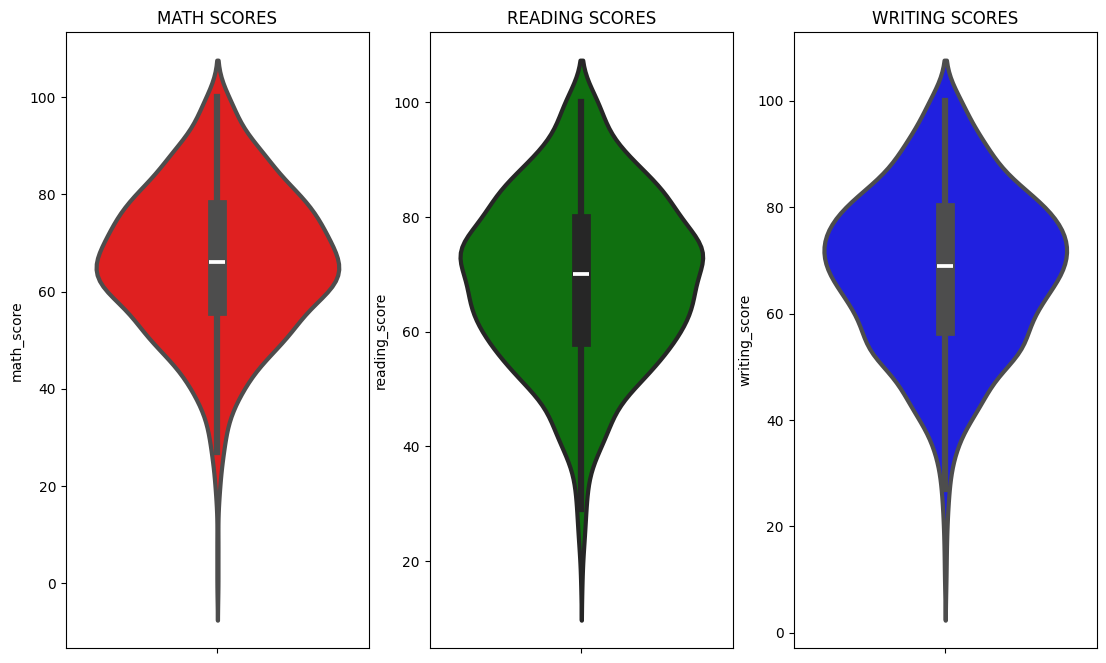

In [50]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=student_df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=student_df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=student_df,color='blue',linewidth=3)
plt.show()

# Insights
* From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### 4.3 Multivariate analysis using pieplot


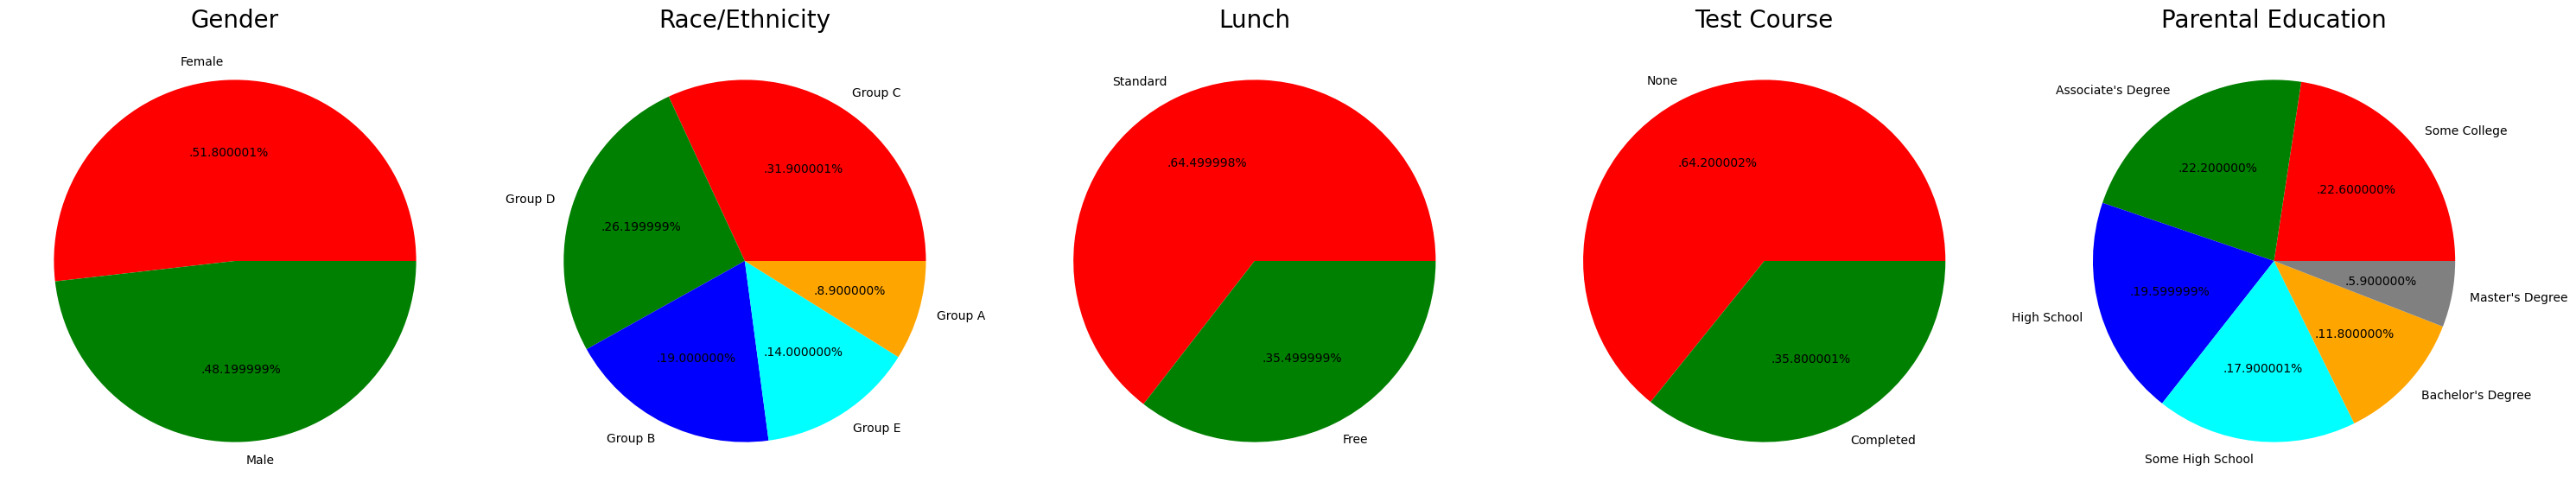

In [53]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = student_df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = student_df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = student_df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = student_df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = student_df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Insights
* Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 4.4 Feature Wise Visualization
### 4.4.1 GENDER COLUMN
* How is distribution of Gender ?
* Is gender has any impact on student's performance ?

### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

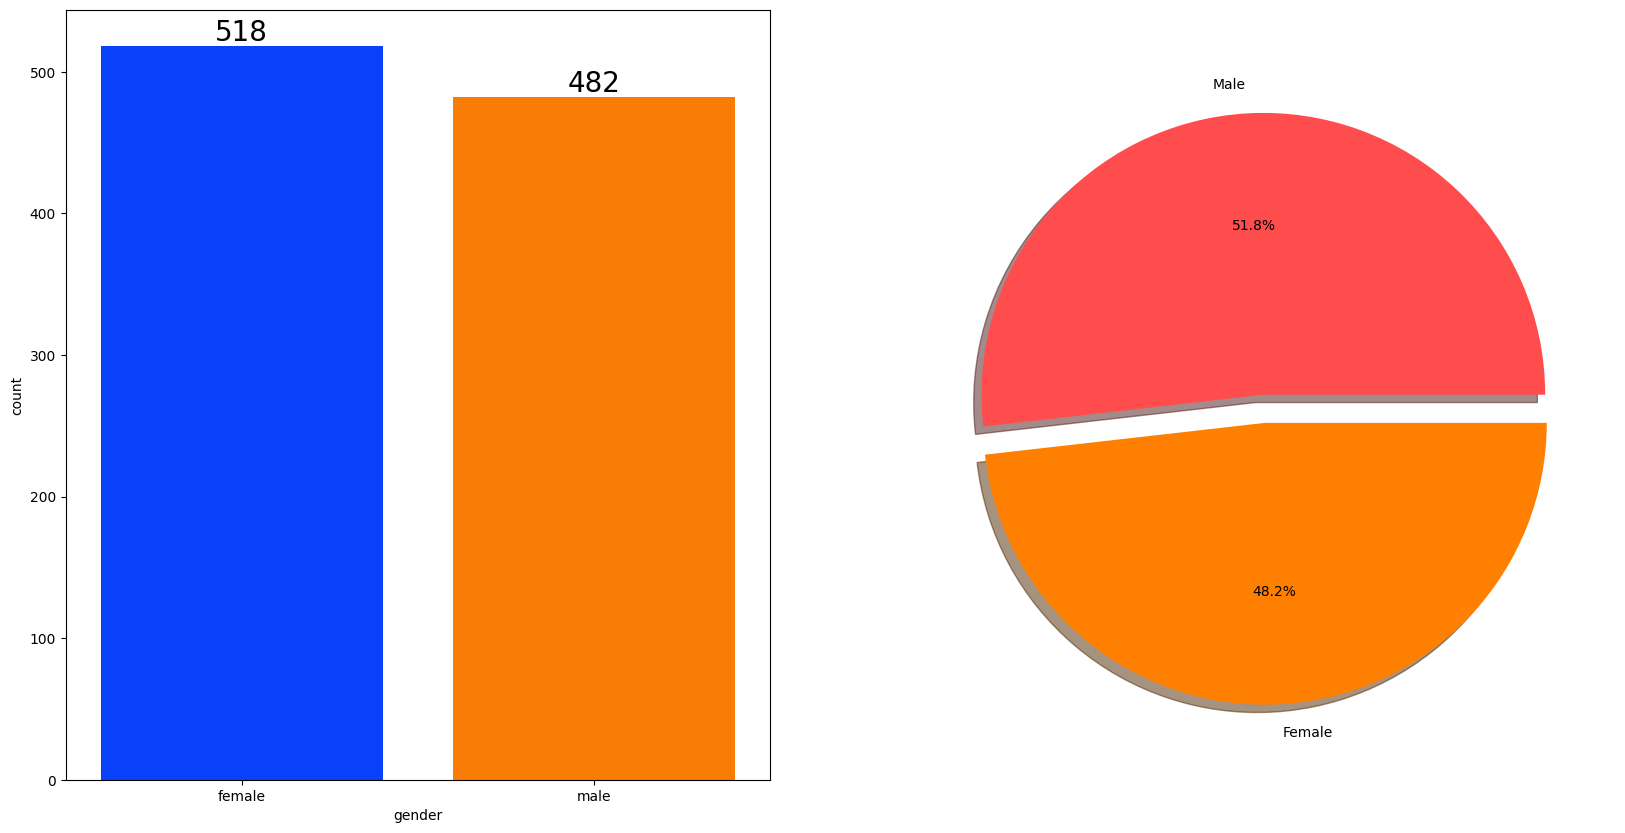

In [55]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=student_df['gender'],data=student_df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=student_df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### Insights
* Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

### 4.4.2 RACE/EHNICITY COLUMN
* How is Group wise distribution ?
* Is Race/Ehnicity has any impact on student's performance ?

### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

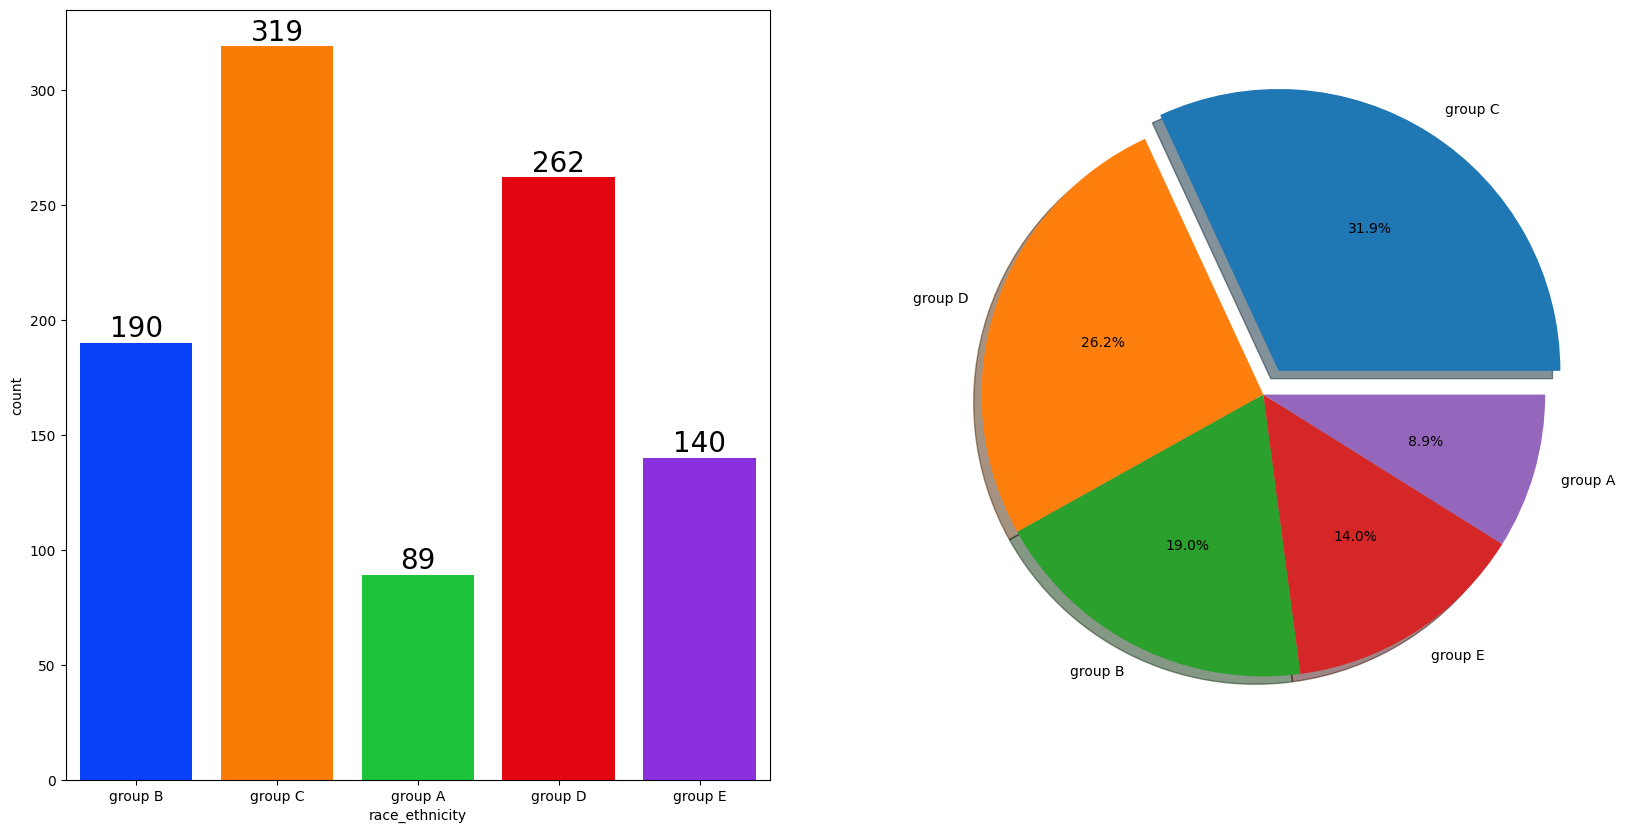

In [62]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=student_df['race_ethnicity'],data=student_df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = student_df['race_ethnicity'].value_counts(),labels=student_df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

### Insights
* Most of the student belonging from group C /group D.
* Lowest number of students belong to groupA.

### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )


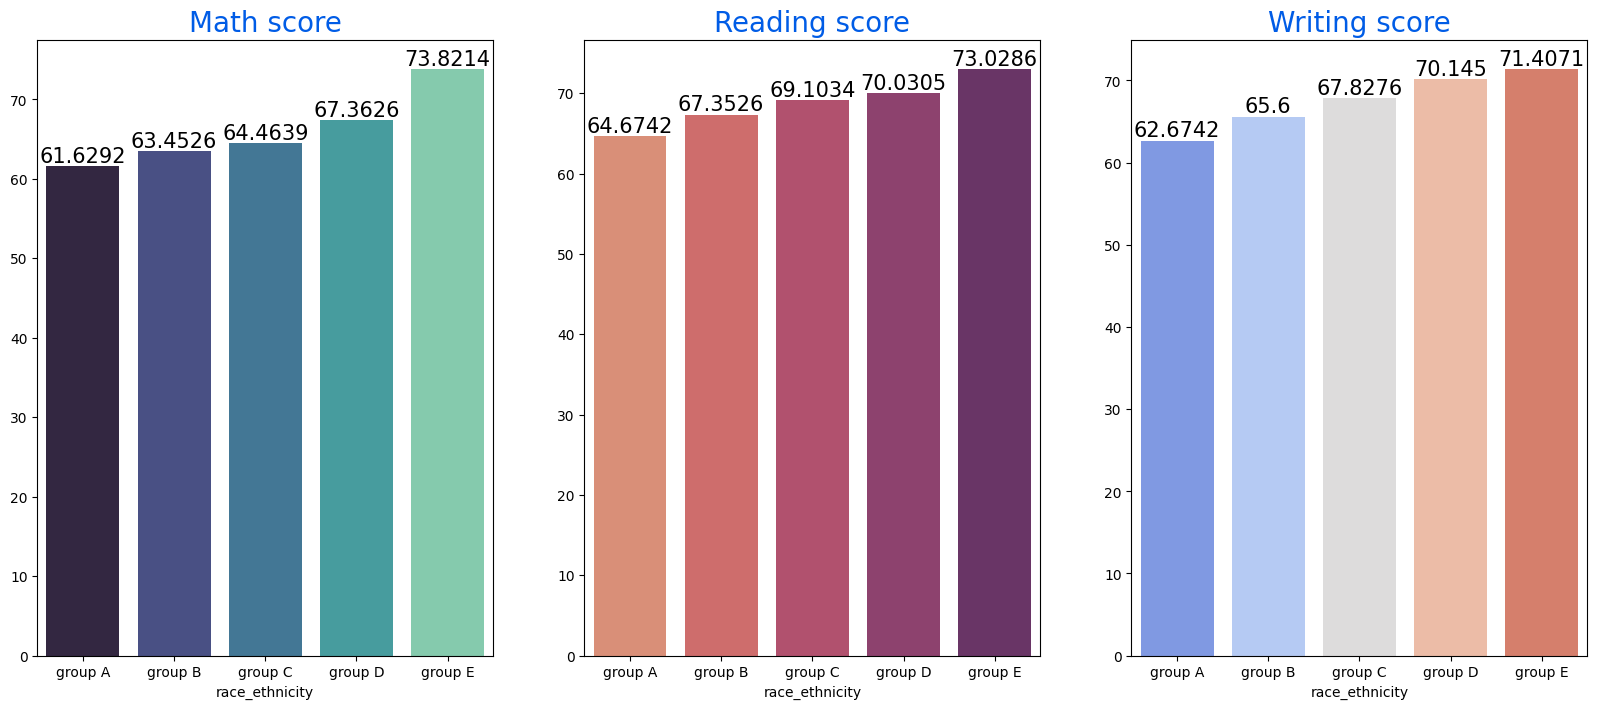

In [64]:
Group_data2=student_df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

# Insights
* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.
* Students from a lower Socioeconomic status have a lower avg in all course subjects

### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
* What is educational background of student's parent ?
* Is parental education has any impact on student's performance ?

### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )


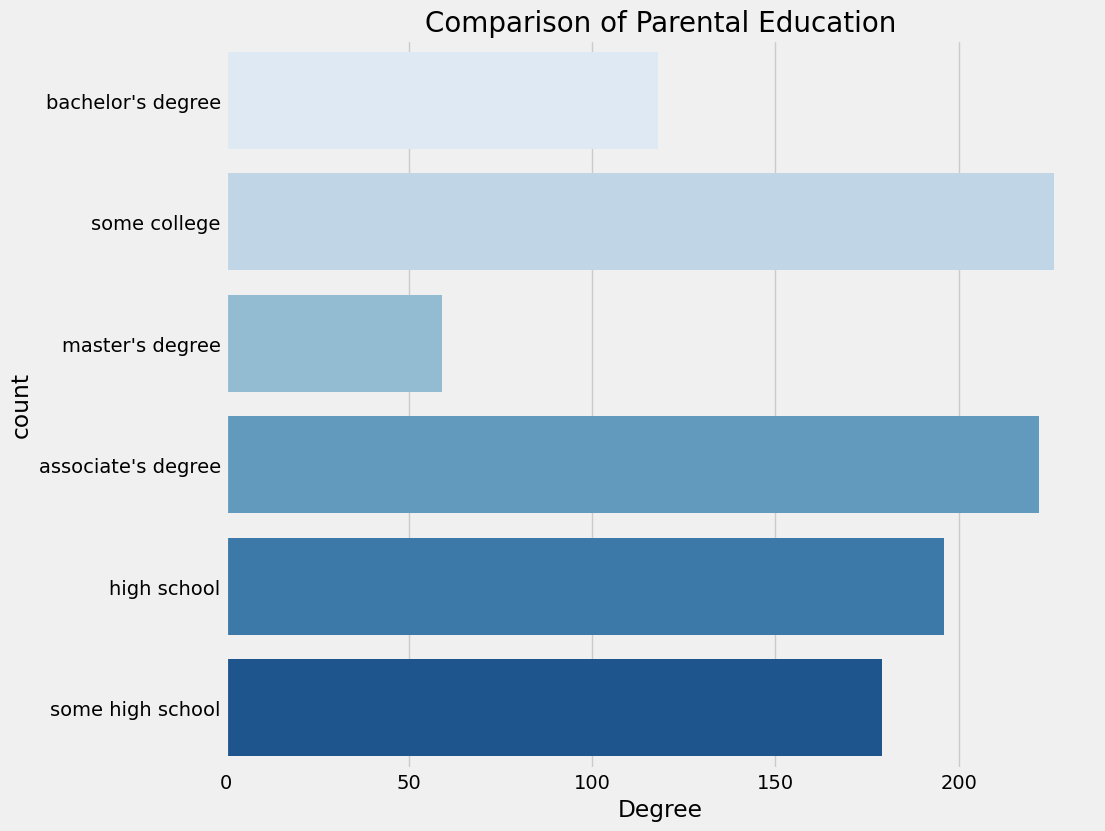

In [66]:
plt.rcParams['figure.figsize'] = (10, 9)
plt.style.use('fivethirtyeight')
sns.countplot(student_df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

# Insights
* Largest number of parents are from some college.

### 4.4.4 LUNCH COLUMN
* Which type of lunch is most common amoung students ?
* What is the effect of lunch type on test results?


### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )


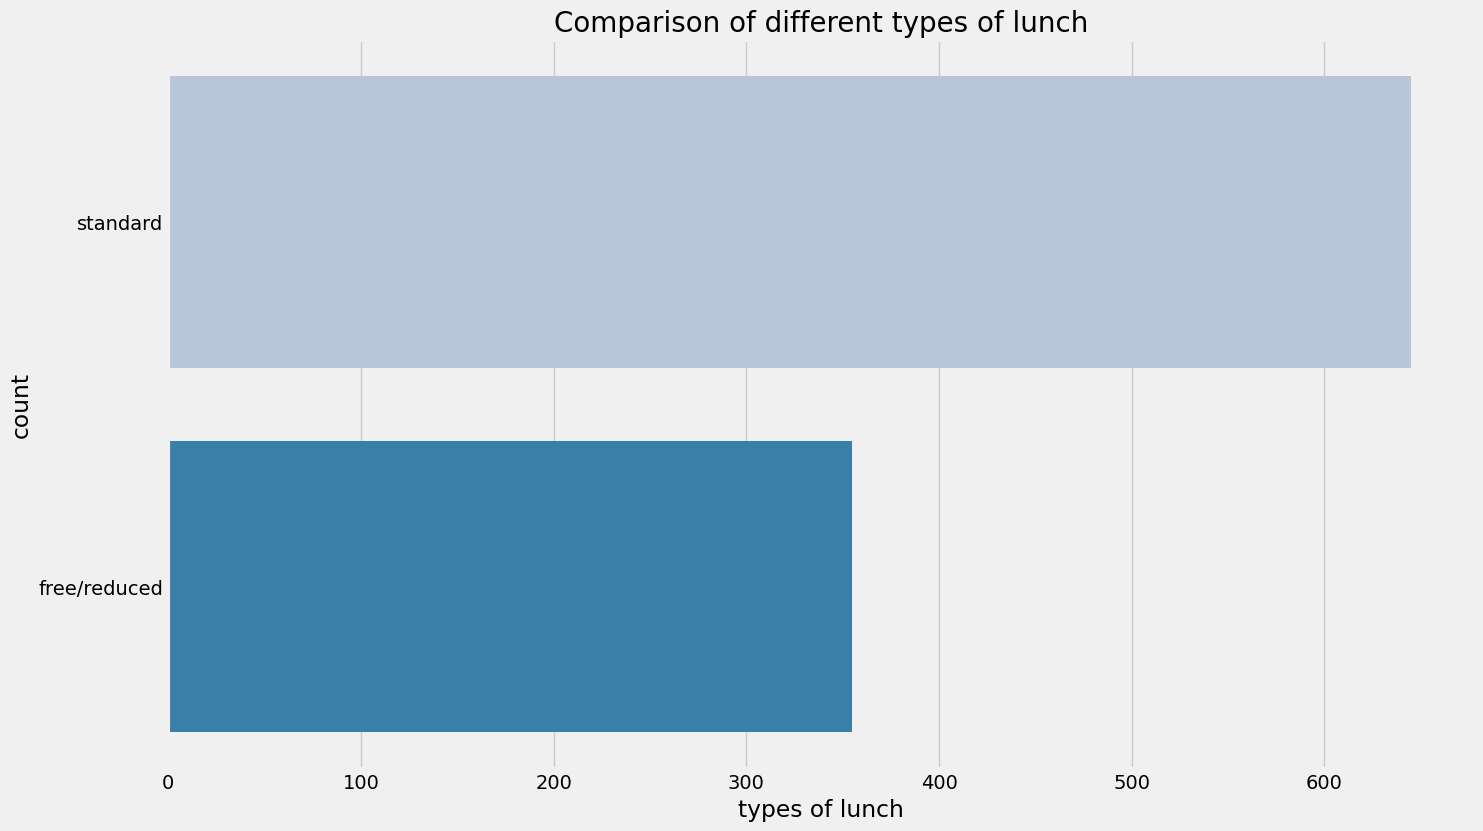

In [70]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(student_df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

### Insights
* Students being served Standard lunch was more than free lunch

### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )


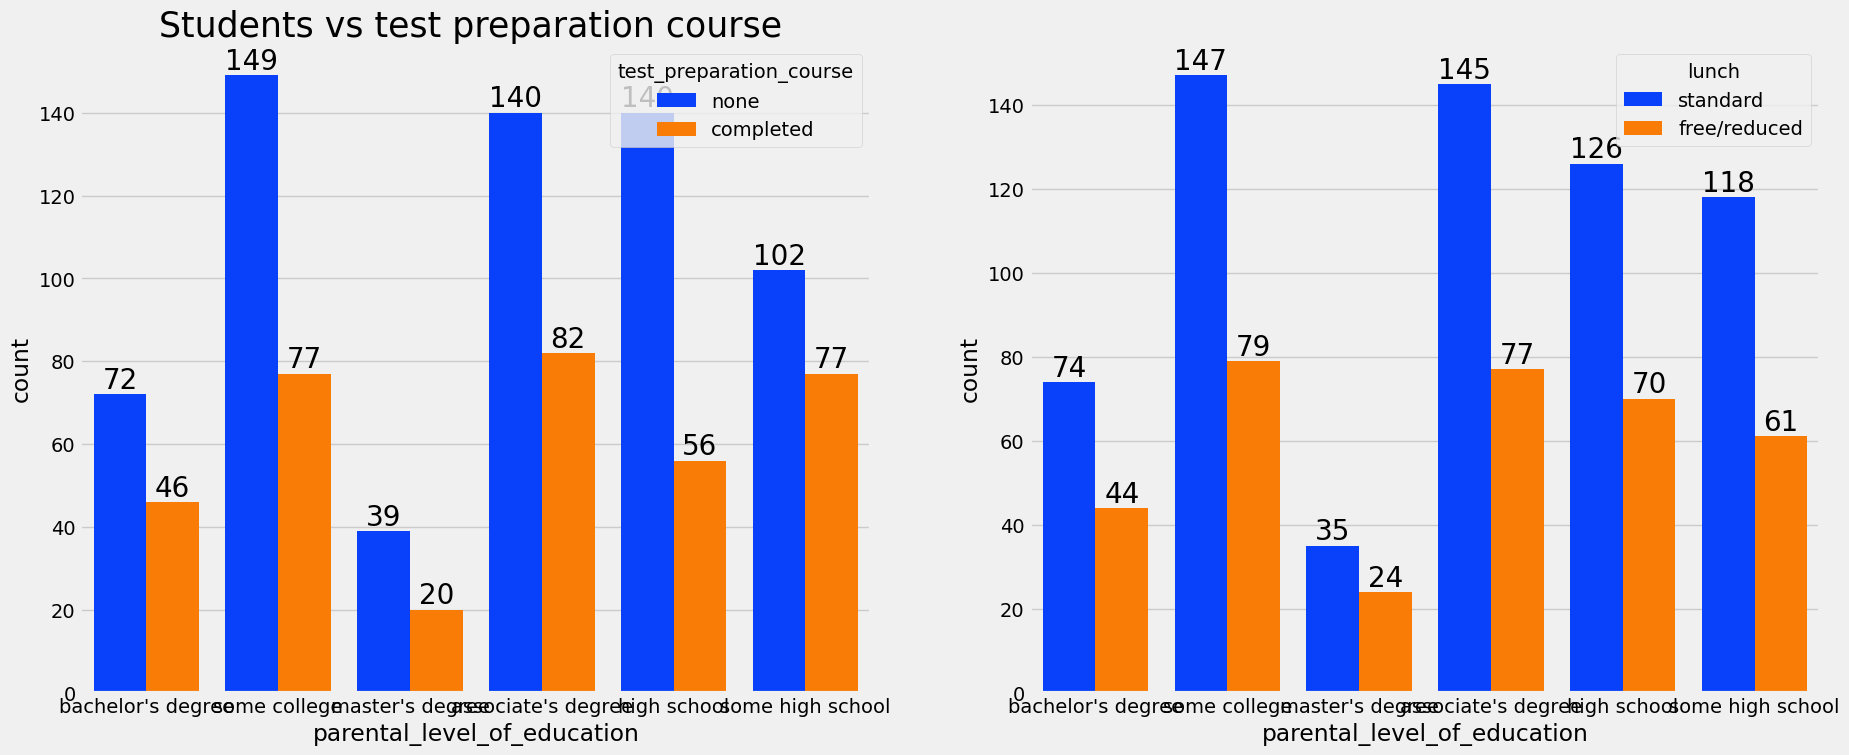

In [73]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=student_df['parental_level_of_education'],data=student_df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=student_df['parental_level_of_education'],data=student_df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

### 4.4.6 Checking Outliers

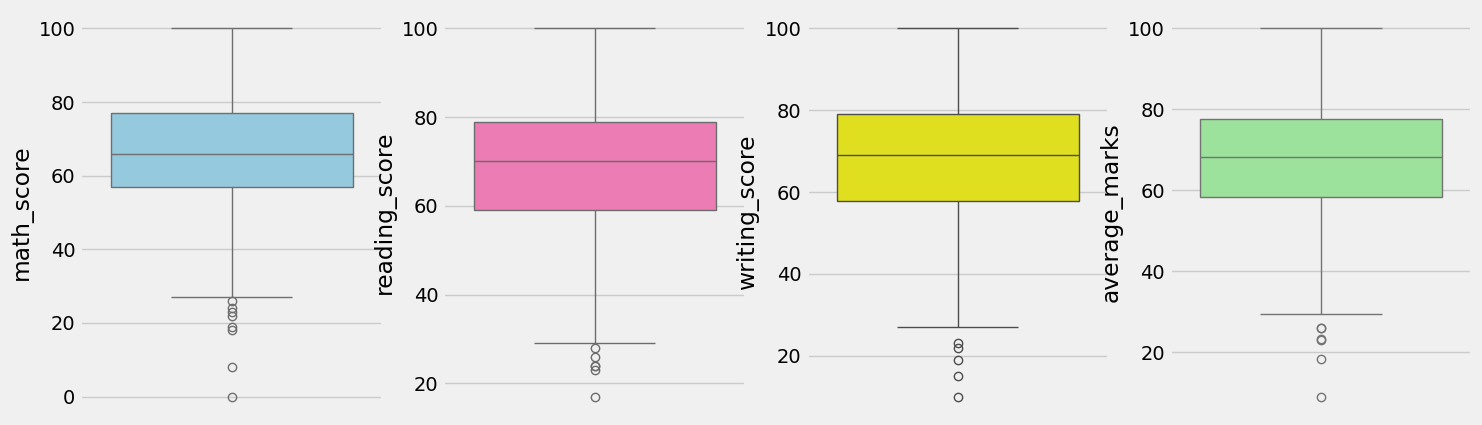

In [74]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(student_df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(student_df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(student_df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(student_df['average_marks'],color='lightgreen')
plt.show()

### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT


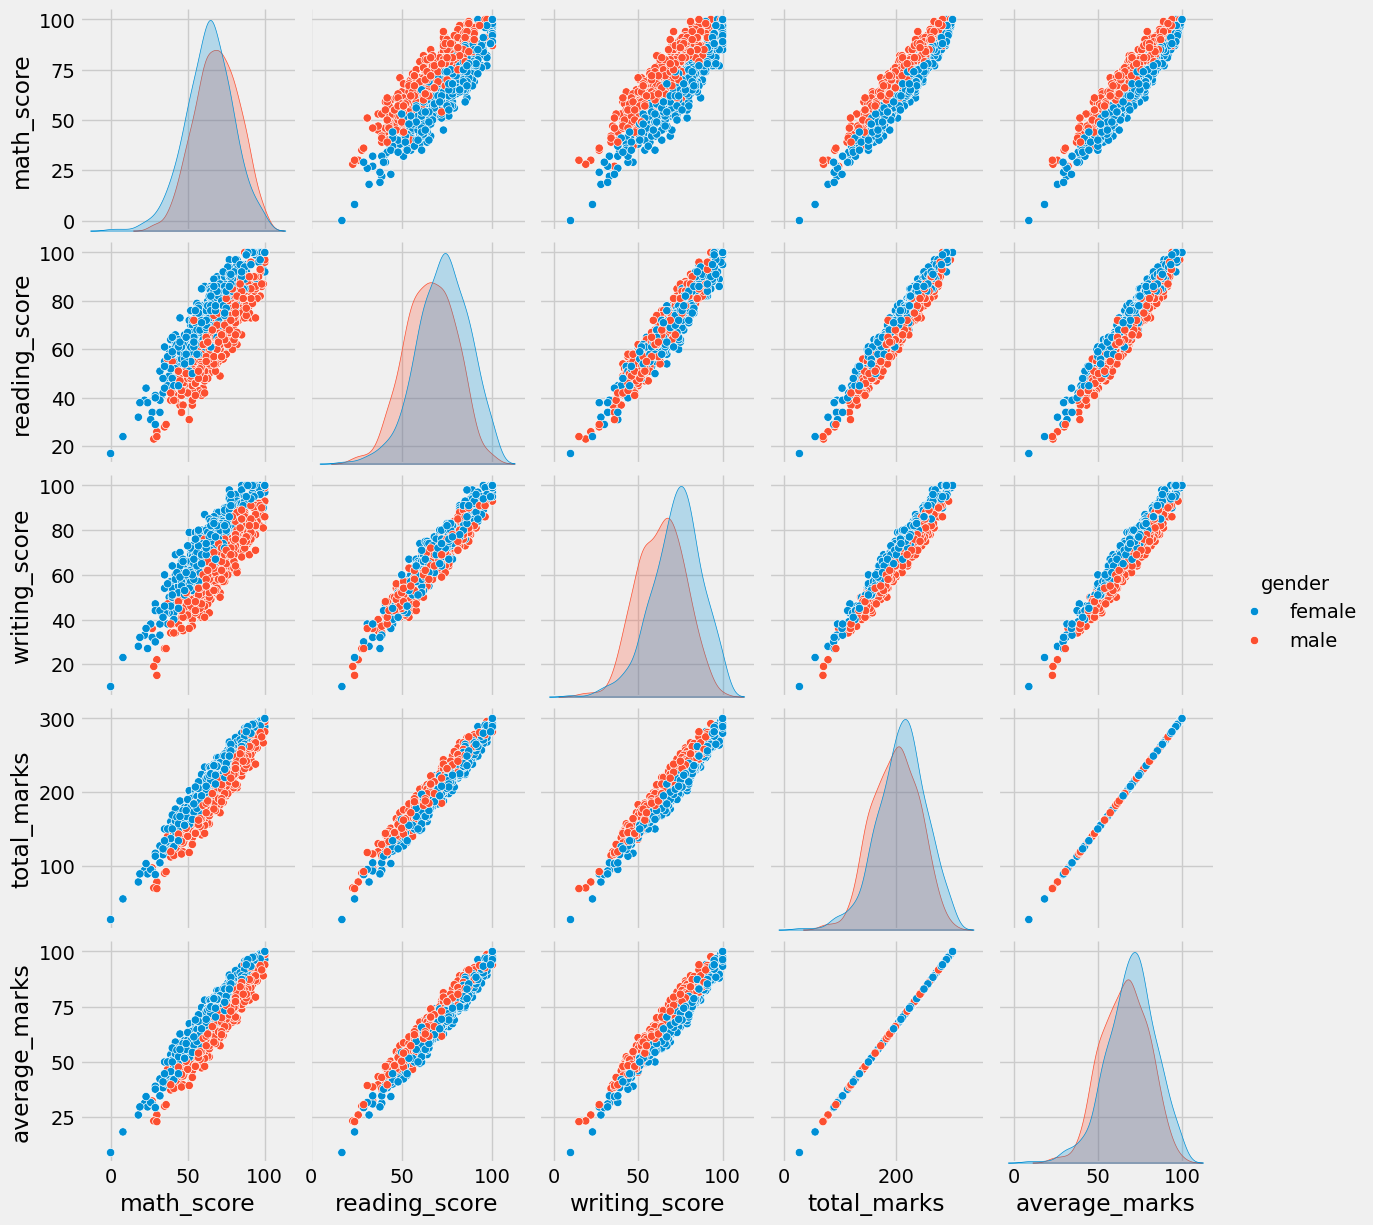

In [75]:
sns.pairplot(student_df,hue = 'gender')
plt.show()

### Insights
* From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial.